# Week 3 - Assignment 2
## Analysis of the household income per census tract in LA County
### Alain Jabbour

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib

In [2]:
geojson_path = 'Median_Income_and_AMI_(census_tract).geojson'

In [3]:
df = gpd.read_file(geojson_path)

In [4]:
df.shape

(2495, 14)

In [5]:
df.head(5)

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


In [6]:
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tract                   2495 non-null   object  
 1   med_hh_income           2458 non-null   float64 
 2   med_hh_income_universe  2495 non-null   int64   
 3   ami_category            2458 non-null   object  
 4   below_med_income        2458 non-null   object  
 5   below_60pct_med_income  2458 non-null   object  
 6   below_moderate_income   2458 non-null   object  
 7   sup_dist                2495 non-null   object  
 8   csa                     2495 non-null   object  
 9   spa                     2495 non-null   object  
 10  ESRI_OID                2495 non-null   int64   
 11  Shape__Area             2495 non-null   float64 
 12  Shape__Length           2495 non-null   float64 
 13  geometry                2495 non-null   geometry
dtypes: float64(3), g

In [7]:
df['med_hh_income'].head

<bound method NDFrame.head of 0        38892.0
1        41027.0
2        42500.0
3        37232.0
4        65000.0
          ...   
2490    126450.0
2491    107672.0
2492    104439.0
2493    131012.0
2494     90280.0
Name: med_hh_income, Length: 2495, dtype: float64>

In [8]:
df['med_hh_income'].mean()

76849.3344182262

In [9]:
#general statistical analysis
df['med_hh_income'].describe()

count      2458.000000
mean      76849.334418
std       35546.132788
min        4918.000000
25%       51157.500000
50%       69698.000000
75%       94515.500000
max      250001.000000
Name: med_hh_income, dtype: float64

<Axes: ylabel='Frequency'>

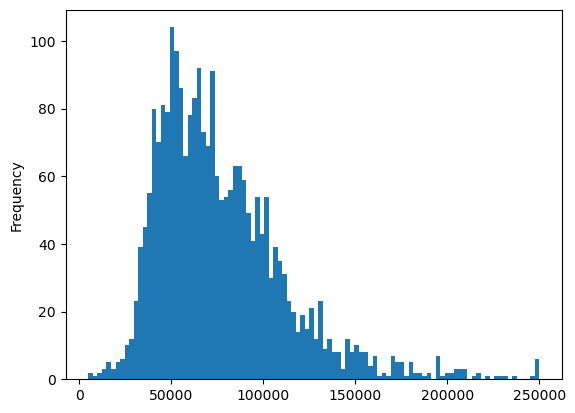

In [10]:
df['med_hh_income'].plot.hist(bins=100)

In [11]:
#sorting from high to low
df_sorted=df.sort_values(by='med_hh_income',ascending=False)
df_sorted.head(20)

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
1303,06037262100,250001.0,1071,Above Moderate Income,No,No,No,District 3,Los Angeles - Bel Air,SPA 5 - West,3650,9.426846e+07,66231.938029,"POLYGON ((-118.46818 34.12958, -118.46400 34.1..."
1308,06037262400,250001.0,1101,Above Moderate Income,No,No,No,District 3,Los Angeles - Mandeville Canyon,SPA 5 - West,3655,1.211436e+08,72274.410067,"POLYGON ((-118.52067 34.11887, -118.51849 34.1..."
1930,06037141700,250001.0,1242,Above Moderate Income,No,No,No,District 3,Los Angeles - Sherman Oaks,SPA 2 - San Fernando,4277,3.486321e+07,29123.886173,"POLYGON ((-118.45309 34.13512, -118.45010 34.1..."
1307,06037262303,250001.0,1063,Above Moderate Income,No,No,No,District 3,Los Angeles - Brentwood,SPA 5 - West,3654,2.786759e+07,27207.243538,"POLYGON ((-118.49546 34.07280, -118.49475 34.0..."
2090,06037980019,250001.0,37,Above Moderate Income,No,No,No,District 3,Los Angeles - Palisades Highlands,SPA 5 - West,4437,4.764246e+08,149651.651162,"POLYGON ((-118.59806 34.07622, -118.57251 34.1..."
1196,06037670500,250000.0,550,Above Moderate Income,No,No,No,District 4,City of Rolling Hills,SPA 8 - South Bay,3543,8.251888e+07,46433.119900,"POLYGON ((-118.36583 33.76697, -118.36447 33.7..."
1309,06037262501,246750.0,1335,Above Moderate Income,No,No,No,District 3,Los Angeles - Pacific Palisades,SPA 5 - West,3656,1.747755e+07,19392.943407,"POLYGON ((-118.52798 34.05453, -118.52824 34.0..."
1384,06037800206,236709.0,1171,Above Moderate Income,No,No,No,District 3,Unincorporated - Santa Monica Mountains,SPA 2 - San Fernando,3731,9.972052e+07,49071.393038,"POLYGON ((-118.69387 34.15956, -118.69338 34.1..."
1305,06037262301,231188.0,809,Above Moderate Income,No,No,No,District 3,Los Angeles - Brentwood,SPA 5 - West,3652,1.406689e+08,70786.556789,"POLYGON ((-118.51350 34.12904, -118.50834 34.1..."
2375,06037194300,228836.0,1389,Above Moderate Income,No,No,No,District 3,Los Angeles - Hollywood,SPA 4 - Metro,4722,2.622790e+07,30785.972937,"POLYGON ((-118.39587 34.09435, -118.39542 34.0..."


<Axes: >

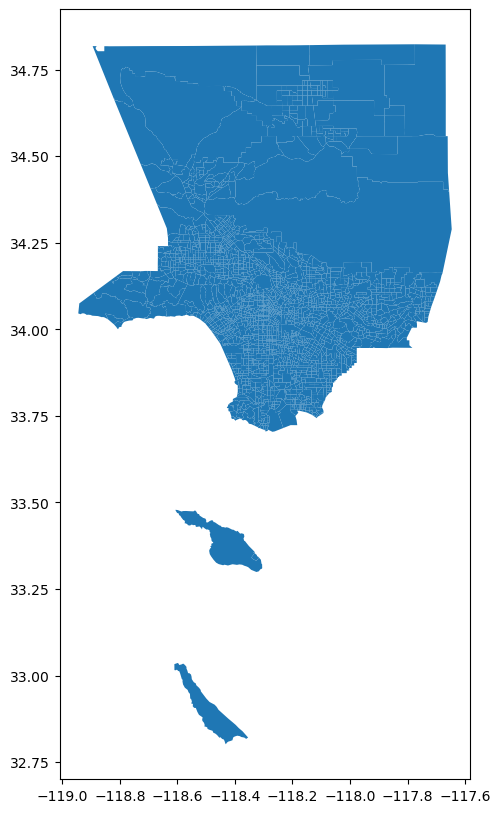

In [12]:
df.plot(figsize=(12,10))

In [13]:
#using the matplotlib colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

<Axes: >

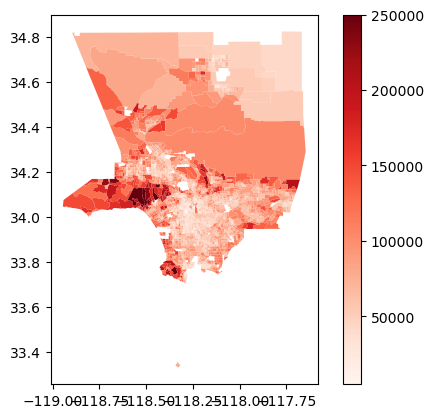

In [14]:
#plotting the data in a continuous color representation
norm = Normalize(vmin=df['med_hh_income'].min(), vmax=df['med_hh_income'].max())
df.plot(column='med_hh_income', cmap='Reds', norm=norm, legend=True)

<Axes: >

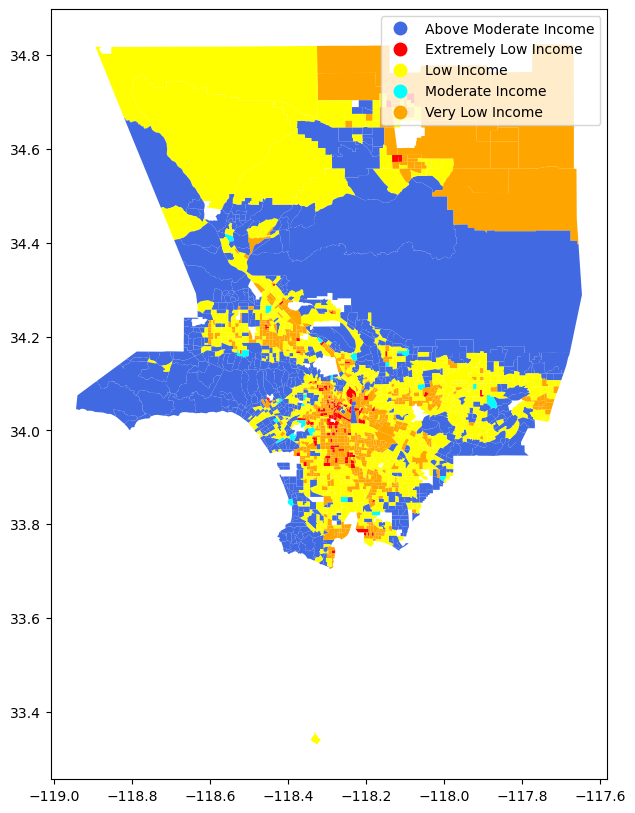

In [20]:
#color_dict = {'Above Moderate Income': 'orange', 'Moderate Income': 'yellow', 'Low Income': 'cyan' ,'Very Low Income': 'royalblue', 'Extremely Low Income': 'blue'}
colors = ["royalblue", "red", "yellow", "cyan","orange"]
cmap = matplotlib.colors.ListedColormap(colors)
df.plot(figsize=(12,10),
                 column='ami_category',
        cmap=cmap,
                 legend=True)

In [ ]:
df.plot(figsize=(12,10),
                 column='below_med_income',
                 legend=True)

In [ ]:
df.plot(figsize=(12,10),
                 column='below_60pct_med_income',
                 legend=True)

In [ ]:
df.plot(figsize=(12,10),
                 column='below_moderate_income',
                 legend=True)